I'm a big fan of Anki, which is a flashcard software written in Python.

Sometimes, it's interesting to know how the software you like works. In this case, there are already existing guides, for instance this one: https://www.juliensobczak.com/write/2016/12/26/anki-scripting.html.

In this exploration, I'm building upon this guide to explore my collection and list particular Japanese cards for further editing.

# Opening the database 

I'm working on a Mac. Where is the Anki data located in this case? Searching around in the GUI, I've found the following locations:

In [1]:
import os

path_to_anki = os.path.expanduser('~/Library/Application Support/Anki2/User 1')
path_to_collection = os.path.join(path_to_anki, 'collection.anki2')

To make use of the Anki API, we need to append the path to the Anki library to our Python path. As suggested in the above blog, I've cloned the Anki repo for the purpose of this blog post.

```shell
git clone https://github.com/dae/anki.git
```

In [2]:
import sys
sys.path.append(os.path.expanduser('~/workspace/anki'))

We can now access the API used by the Desktop Anki App itself and open my existing database to display some of the Japanese kanji I've used in my decks.

In [3]:
from anki.storage import Collection

col = Collection(path_to_collection, log=True)

for cid in col.findNotes("tag:RTK"): 
    note = col.getNote(cid)
    front =  note.fields[0]
    print(front, end='')

col.close()

一二三四五六七八九十口日月田目古吾冒朋明唱晶品呂昌早旭世胃旦胆亘凹凸旧自白百中千舌升昇丸寸専博占上下卓朝只貝貞員見児元頁頑凡負万句肌旬勺的首乙乱直具真工左右有賄貢項刀刃切召昭則副別丁町可頂子孔了女好如母貫兄克小少大多夕汐外名石肖硝砕砂削光太器臭妙省厚奇川州順水氷永泉原願泳沼沖江汁潮源活消況河泊湖測土吐圧埼垣圭封涯寺時均火炎煩淡灯畑災灰点照魚漁里黒墨鯉量厘埋同洞胴向尚字守完宣宵安宴寄富貯木林森桂柏枠梢棚杏桐植枯朴村相机本札暦案燥未末沫味妹朱株若草苦寛薄葉模漠墓暮膜苗兆桃眺犬状黙然荻狩猫牛特告先洗介界茶合塔王玉宝珠現狂皇呈全栓理主注柱金銑鉢銅釣針銘鎮道導辻迅造迫逃辺巡車連軌輸前各格略客額夏処条落冗軍輝運冠夢坑高享塾熟亭京涼景鯨舎周週士吉壮荘売学覚栄書津牧攻敗枚故敬言警計獄訂討訓詔詰話詠詩語読調談諾諭式試弐域賊栽載茂成城誠威滅減桟銭浅止歩渉頻肯企歴武賦正証政定錠走超赴越是題堤建延誕礎婿衣裁装裏壊哀遠猿初布帆幅帽幕幌錦市姉肺帯滞刺制製転芸雨雲曇雷霜冬天橋嬌立泣章競帝童瞳鐘商嫡適滴敵匕北背比昆皆混渇謁褐喝旨脂壱毎敏梅海乞乾腹複欠吹炊歌軟次茨資姿諮賠培剖音暗韻識鏡境亡盲妄荒望方妨坊芳肪訪放激脱説鋭曽増贈東棟凍妊廷染燃賓歳県栃地池虫蛍蛇虹蝶独蚕風己起妃改記包胞砲泡亀電竜滝豚逐遂家嫁豪腸場湯羊美洋詳鮮達羨差着唯焦礁集准進雑雌準奮奪確午許歓権観羽習翌曜濯曰困固国団因姻園回壇店庫庭庁床麻磨心忘忍認忌志誌忠串患思恩応意想息憩恵恐惑感憂寡忙悦恒悼悟怖慌悔憎慣愉惰慎憾憶慕添必泌手看摩我義議犠抹抱搭抄抗批招拓拍打拘捨拐摘挑指持括揮推揚提損拾担拠描操接掲掛研戒械鼻刑型才財材存在乃携及吸扱丈史吏更硬又双桑隻護獲奴怒友抜投没設撃殻支技枝肢茎怪軽叔督寂淑反坂板返販爪妥乳浮将奨採菜受授愛払広拡鉱弁雄台怠治始胎窓去法会至室到致互棄育撤充銃硫流允唆出山拙岩炭岐峠崩密蜜嵐崎入込分貧頒公松翁訟谷浴容溶欲裕鉛沿賞党堂常裳掌皮波婆披破被残殉殊殖列裂烈死葬瞬耳取趣最撮恥職聖敢聴懐慢漫買置罰寧濁環還夫扶渓規替賛潜失鉄迭臣姫蔵臓賢堅臨覧巨拒力男労募劣功勧努励加賀架脇脅協行律復得従徒待往征径彼役徳徹徴懲微街衡稿稼程税稚和移秒秋愁私秩秘称利梨穫穂稲香季委秀透誘穀菌米粉粘粒粧迷粋糧菊奥数楼類漆様求球救竹笑笠笹筋箱筆筒等算答策簿築人佐但住位仲体悠件仕他伏伝仏休仮伯俗信佳依例個健側侍停値倣倒偵僧億儀償仙催仁侮使便倍優伐宿傷保褒傑付

# A more complicated query 

Where this gets interesting is that we can quite easily extract some more information about the characters, for instance to sort them. Here, my kanji cards can be ordered by "Heisig number" which should make more sense than the above raw listing.

In [4]:
col = Collection(path_to_collection, log=True)

fields = [col.getNote(cid).fields for cid in col.findNotes("tag:RTK")]
fields = sorted(fields, key=lambda items: int(items[4]))
print("".join([field[0] for field in fields]))
col.close()

一二三四五六七八九十口日月田目古吾冒朋明唱晶品呂昌早旭世胃旦胆亘凹凸旧自白百中千舌升昇丸寸専博占上下卓朝只貝貞員見児元頁頑凡負万句肌旬勺的首乙乱直具真工左右有賄貢項刀刃切召昭則副別丁町可頂子孔了女好如母貫兄克小少大多夕汐外名石肖硝砕砂削光太器臭妙省厚奇川州順水氷永泉原願泳沼沖江汁潮源活消況河泊湖測土吐圧埼垣圭封涯寺時均火炎煩淡灯畑災灰点照魚漁里黒墨鯉量厘埋同洞胴向尚字守完宣宵安宴寄富貯木林森桂柏枠梢棚杏桐植枯朴村相机本札暦案燥未末沫味妹朱株若草苦寛薄葉模漠墓暮膜苗兆桃眺犬状黙然荻狩猫牛特告先洗介界茶合塔王玉宝珠現狂皇呈全栓理主注柱金銑鉢銅釣針銘鎮道導辻迅造迫逃辺巡車連軌輸前各格略客額夏処条落冗軍輝運冠夢坑高享塾熟亭京涼景鯨舎周週士吉壮荘売学覚栄書津牧攻敗枚故敬言警計獄訂討訓詔詰話詠詩語読調談諾諭式試弐域賊栽載茂成城誠威滅減桟銭浅止歩渉頻肯企歴武賦正証政定錠走超赴越是題堤建延誕礎婿衣裁装裏壊哀遠猿初布帆幅帽幕幌錦市姉肺帯滞刺制製転芸雨雲曇雷霜冬天橋嬌立泣章競帝童瞳鐘商嫡適滴敵匕北背比昆皆混渇謁褐喝旨脂壱毎敏梅海乞乾腹複欠吹炊歌軟次茨資姿諮賠培剖音暗韻識鏡境亡盲妄荒望方妨坊芳肪訪放激脱説鋭曽増贈東棟凍妊廷染燃賓歳県栃地池虫蛍蛇虹蝶独蚕風己起妃改記包胞砲泡亀電竜滝豚逐遂家嫁豪腸場湯羊美洋詳鮮達羨差着唯焦礁集准進雑雌準奮奪確午許歓権観羽習翌曜濯曰困固国団因姻園回壇店庫庭庁床麻磨心忘忍認忌志誌忠串患思恩応意想息憩恵恐惑感憂寡忙悦恒悼悟怖慌悔憎慣愉惰慎憾憶慕添必泌手看摩我義議犠抹抱搭抄抗批招拓拍打拘捨拐摘挑指持括揮推揚提損拾担拠描操接掲掛研戒械鼻刑型才財材存在乃携及吸扱丈史吏更硬又双桑隻護獲奴怒友抜投没設撃殻支技枝肢茎怪軽叔督寂淑反坂板返販爪妥乳浮将奨採菜受授愛払広拡鉱弁雄台怠治始胎窓去法会至室到致互棄育撤充銃硫流允唆出山拙岩炭岐峠崩密蜜嵐崎入込分貧頒公松翁訟谷浴容溶欲裕鉛沿賞党堂常裳掌皮波婆披破被残殉殊殖列裂烈死葬瞬耳取趣最撮恥職聖敢聴懐慢漫買置罰寧濁環還夫扶渓規替賛潜失鉄迭臣姫蔵臓賢堅臨覧巨拒力男労募劣功勧努励加賀架脇脅協行律復得従徒待往征径彼役徳徹徴懲微街衡稿稼程税稚和移秒秋愁私秩秘称利梨穫穂稲香季委秀透誘穀菌米粉粘粒粧迷粋糧菊奥数楼類漆様求球救竹笑笠笹筋箱筆筒等算答策簿築人佐但住位仲体悠件仕他伏伝仏休仮伯俗信佳依例個健側侍停値倣倒偵僧億儀償仙催仁侮使便倍優伐宿傷保褒傑付

# Exporting to HTML with related vocabulary 

The last thing I would like to show here is how to use this data to create a mapping of kanji to words containing these kanji. What I mean by this, is that I also have a list of Japanse words that are made of kanji. I would like to produce a table that shows, for each kanji, the associated vocabulary I already have in my deck. Let's try this with the kanji 出. I can list the vocabulary cards that have this character in them:

In [5]:
col = Collection(path_to_collection, log=True)
try:
    notes = col.findNotes('出 deck:Japanese "note:Japanese (expression, meaning, reading)"')
    for cid in notes:
        note = col.getNote(cid)
        expression = note.fields[1]
        if '出' in expression:
            print(expression)
finally:
    col.close()

出す
出かける
出口
出る
知らない単語に出くわしたら辞書でそれを調べなさい。
出来るだけ
出力
出会う
部屋<span style="font-weight:600; color:#0000ff;">[...]</span>出た。
出入
思い出
思い出す
出席する
出発
引き出し
引き出す
降り出す
輸出
思い出
外出
最初のころを思い出す。
出身


There we are: I can list all expressions associated with a given kanji. Let's now write an HTML file that lists the Kanji and associated vocabulary, in Heisig order. 

In [6]:
kanjis = [field[0] for field in fields]
mapping = {}

col = Collection(path_to_collection, log=True)
try:
    for kanji in kanjis:
        query = '{} deck:Japanese "note:Japanese (expression, meaning, reading)"'.format(kanji)
        notes = col.findNotes(query)
        vocab = []
        for cid in notes:
            note = col.getNote(cid)
            expression = note.fields[1]
            if kanji in expression:
                vocab.append("{} ({}): {}".format(expression, note.fields[2], note.fields[0]))
        mapping[kanji] = vocab
finally:
    col.close()

In [7]:
path_to_html = os.path.join(os.path.expanduser('~/workspace/anki'), 'kanji_vocab.html')

with open(path_to_html, 'w') as f:
    f.writelines('<html>')
    f.writelines('<head><meta charset="utf-8"></head>')
    f.writelines('<body>')
    for kanji, field in zip(kanjis, fields):
        rendered_kanji = '{} - {}  {}'.format(field[4], kanji, field[1])
        rendered_vocab = ''
        for word in mapping[kanji]:
            rendered_vocab += "<li>{}</li>".format(word.strip().replace('<br>', ' ').replace(kanji, '<b>{}</b>'.format(kanji)))
        line = """<div><span>{}</span><ul>{}</ul></div>""".format(rendered_kanji, rendered_vocab)
        f.writelines(line)
    f.writelines('</body></html>')

Using the above, I've ended up with a nice HTML file that looks like this.

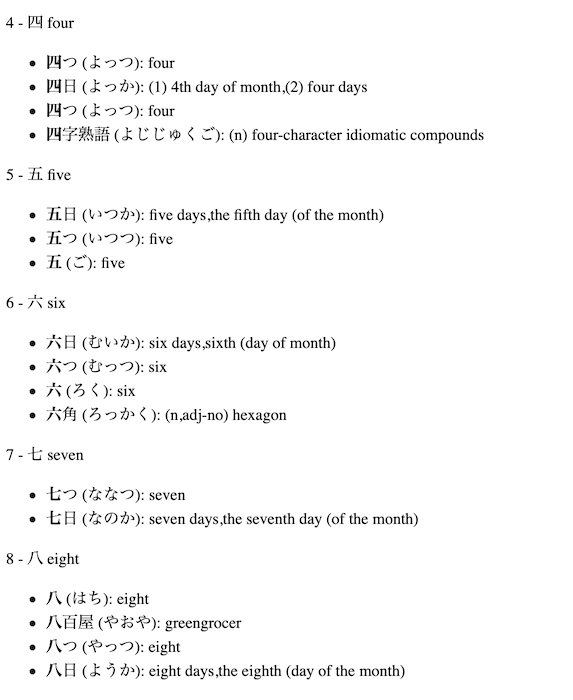






That's it! I hope you've enjoyed this post about using the Anki API for advanced access of your Anki database.

*This post was entirely written using the IPython notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20190323_AnkiKanji.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20190323_AnkiKanji.ipynb).*